In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Input,
    GlobalAveragePooling2D,
)
from tensorflow.keras.applications import (
    VGG16,
    ResNet50,
    MobileNet,
    InceptionV3,
    Xception,
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

1. ✅ include_top=True<br>

VGG16 전체 모델을 가져오는 거야.

마지막 Flatten, Fully Connected (Dense) 층, 그리고 Softmax로 된 **분류기(classifier)**까지 포함돼.

즉, ImageNet 데이터셋에 맞춰 훈련된 1000개 클래스용 분류기까지 그대로 가져오는 거야.

이건 전이학습에서 그냥 Feature Extractor로 쓰는 게 아니라 전체 모델을 사용하고 싶을 때 선택해.

```python
base_model = VGG16(weights='imagenet', include_top=True)
```
2. ✅ include_top=False<br>

Conv + Pooling Layer만 가져옴 → 즉, Feature Extractor만 사용하는 거야.

Flatten, Dense, Softmax 이런 거 없음.

대신 너가 직접 분류기(Dense Layer 등)를 새로 쌓아서 네 데이터셋에 맞게 학습시킬 수 있어 (예: 고양이/강아지 2개 클래스만).

이 경우 input_shape=(224, 224, 3)를 명시적으로 꼭 지정해야 돼.

```python
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
```

3. 🔧 weights 파라미터 설명

✅ weights='imagenet'


ImageNet 데이터셋 (1000개 클래스, 수백만 장 이미지)으로 사전 학습된 가중치를 불러와.

즉, 모델이 이미 세상 많은 이미지에서 학습한 특징들을 갖고 있어.

전이 학습(Transfer Learning) 할 때 보통 이걸 써서 학습 시간을 단축하고 성능도 잘 나옴.

In [13]:
base_model = VGG16(weights="imagenet", include_top=True, input_shape=(224, 224, 3))
# include_top = True : extractor 와 classifier 동시에 업로드
# False : feature extractor 만 업로드

base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(240, 240, 3))

base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

파인튜닝 (Fine-Tuning)
정의: 전이학습한 모델의 일부 또는 전부를 **다시 학습(fine-tune)** 하는 과정.

일반적으로 새로 추가된 분류기만 먼저 학습하고, 그 후에 전체 또는 일부 conv 층을 학습 가능하게 풀어줌.

목적: 새로운 데이터셋에 맞춰 기존 feature extractor를 조금 수정해서 성능을 높이는 것.

In [15]:
model = Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(4, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,320,644 (62.26 MB)

 Trainable params: 16,320,644 (62.26 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
import os
import shutil
import zipfile

if os.path.exists("cats_and_dogs_filtered"):
    shutil.rmtree("cats_and_dogs_filtered")
    print("기존 압축 삭제!")

with zipfile.ZipFile("cats_and_dogs_filtered.zip", "r") as target_file:
    target_file.extractall()

IMG_WIDTH = 224
IMG_HEIGHT = 224

기존 압축 삭제!


❗ Xception
"Extreme Inception"의 약어

Inception 모듈을 극단적으로 확장한 구조

깊고 복잡한 네트워크 구조로 구성됨

이미지 내에서 다양한 크기와 비율의 객체를 잘 인식할 수 있도록 설계됨

🧠 핵심 개념
📌 Depthwise Convolution
입력 채널별로 각각 컨볼루션을 수행

공간의 특징을 추출

이후 채널 간 상호작용을 조절하고 특성을 결합함

📌 Pointwise Convolution
1×1 컨볼루션을 사용하여

채널 간 선형 결합을 수행함

✅ 요약
Xception은:

Inception보다 더 효율적이고 강력한 구조

Depthwise + Pointwise 구조로 연산 효율을 높이면서도 강력한 성능을 냄

MobileNet 등에서도 이 구조를 차용함

In [17]:
base_model = Xception(
    weights="imagenet", include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
)
base_model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_3[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

🧱 model.add(GlobalAveragePooling2D())

🔴 Global Average Pooling
신경망(CNN) 모델의 마지막 부분에 추가되는 층

🧠 역할과 특징
이전 합성곱 및 풀링 층을 통해 추출된 feature map에 대해
공간 정보를 압축해서 전역적인(global) 특징을 요약함

각 feature map의 공간 평균값을 계산해, 하나의 벡터로 축소함

이렇게 하면 파라미터 수를 줄이면서도 의미 있는 요약 정보를 유지할 수 있음

🧩 활용 방식
GlobalAveragePooling2D() 층 뒤에 **Fully Connected Layer (Dense)** 를 추가하여
최종 분류 또는 회귀 작업을 수행함

여태까지는 Flatten 을 씀

In [18]:
model = Sequential()

model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.25))

model.add(
    Dense(2, activation="softmax")
)  # 예측 결과가 Dog or Cat 두개이므로 최종 출력은 2

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,894,298 (79.71 MB)

 Trainable params: 20,839,770 (79.50 MB)

 Non-trainable params: 54,528 (213.00 KB)

# 🔻 model.add(GlobalAveragePooling2D())

## ✅ 1D 데이터와 2D 데이터에 대한 사용법

---

### 📘 1D 데이터

- **입력 형태**:  
  `(batch_size, sequence_length, features)`

- **사용 예시**:  
  텍스트 분류 모델에서 **단어 시퀀스**를 입력으로 사용하는 경우

- **사용 레이어**:  
  `GlobalAveragePooling1D()`

- **동작 원리**:  
  시퀀스 길이에 상관없이 **각 시퀀스의 평균을 계산**하여  
  **글로벌한 특성(global feature)**을 추출함

---

### 🖼 2D 데이터

- **입력 형태**:  
  `(batch_size, height, width, channels)`

- **사용 예시**:  
  이미지 분류 모델에서 **이미지를 입력**으로 사용하는 경우

- **사용 레이어**:  
  `GlobalAveragePooling2D()`

- **동작 원리**:  
  각 채널의 **특성 맵에 대해 평균을 계산**하여  
  **글로벌한 특성**을 추출함

---

## ✅ 요약표

| 구분       | 입력 형태                             | 예시         | 사용하는 레이어           |
|------------|----------------------------------------|--------------|----------------------------|
| 1D 데이터  | `(batch, sequence_length, features)`   | 텍스트 분류  | `GlobalAveragePooling1D()` |
| 2D 데이터  | `(batch, height, width, channels)`     | 이미지 분류  | `GlobalAveragePooling2D()` |



# 🔍 Flatten() vs GlobalAveragePooling2D() 비교

## ✅ 기본 개념

| 항목 | `Flatten()` | `GlobalAveragePooling2D()` |
|------|-------------|-----------------------------|
| **목적** | Conv 출력 전체를 1D 벡터로 **펼침** | 채널마다 평균값 1개만 뽑아 **요약** |
| **출력 크기** | 큼 (예: 7×7×512 → 25,088) | 작음 (예: 7×7×512 → 512) |
| **파라미터 수** | 많음 → 과적합 위험 ↑ | 적음 → 일반화 ↑ |
| **사용 위치** | Fully Connected 전에 | Fully Connected 전에 |
| **사용 예시** | VGGNet, 전통 CNN | MobileNet, Xception 등 최신 구조 |
| **과적합 위험** | 상대적으로 높음 | 낮음 |
| **정보 보존** | 공간 정보 잘 보존 | 평균으로 요약 → 일부 손실 가능 |
| **속도/효율** | 느림 | 빠르고 가벼움 |

---

## 🧠 요약

- `Flatten()`은 **모든 feature map을 그대로 펼쳐서** Dense 층에 연결  
  → 정보 풍부하지만 과적합 위험이 있음  
- `GlobalAveragePooling2D()`는 **각 채널 평균값만 뽑아 요약**  
  → 구조 단순 + 연산 효율 ↑ + 일반화 성능 ↑


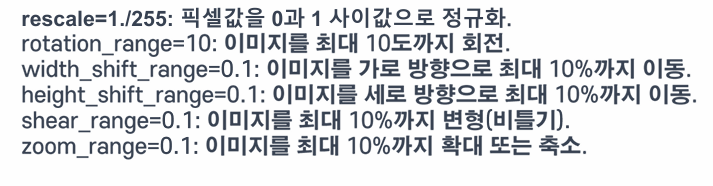

In [19]:
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
)

test_data_gen = ImageDataGenerator(rescale=1.0 / 255)

In [20]:
train_dir = "cats_and_dogs_filtered/train"

test_dir = "cats_and_dogs_filtered/validation"

train_data = train_data_gen.flow_from_directory(
    train_dir,
    batch_size=32,
    color_mode="rgb",
    shuffle=True,
    class_mode="categorical",
    target_size=(IMG_WIDTH, IMG_HEIGHT),
)

test_data = test_data_gen.flow_from_directory(
    test_dir,
    batch_size=32,
    color_mode="rgb",
    shuffle=True,
    class_mode="categorical",
    target_size=(IMG_WIDTH, IMG_HEIGHT),
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 🔄 `flow_from_directory()` 함수

## ✅ 기능 요약

- 디렉토리 내의 이미지를 자동으로 **레이블링**하고,  
- 배치 단위로 이미지를 반환하는 **제너레이터(generator)**를 생성함

---

## 🔧 사용 목적

- 모델의 `fit()` 함수에 입력으로 사용됨
- 이때 **이미지 증강 데이터(augmentation)**가 실시간으로 생성됨
- 학습 및 평가 시에 매우 유용하게 사용됨

---

## 📐 데이터 양 계산

- 증강 데이터의 총 수 =  
  `배치 크기 × 에포크 수 × 원본 데이터 수`

예시:

- 배치 크기: `32`
- 에포크 수: `10`
- 원본 이미지 수: `100`

👉 총 증강 데이터 수 = `32 × 10 × 100 = 32,000`

---

## ✅ 요약

| 기능 | 설명 |
|------|------|
| 자동 레이블링 | 폴더 이름 기준으로 클래스 자동 지정 |
| 제너레이터 생성 | 메모리에 한 번에 다 안 올리고 배치 단위로 처리 |
| 실시간 증강 | 학습 도중에 실시간으로 augmentation 수행 |
| 효율적 학습 | 데이터가 커도 효율적으로 학습 가능 |


In [21]:
print(train_data.class_indices.items())
print(test_data.class_indices.items())

print(len(train_data.classes))
print(len(test_data.classes))

print(train_data.num_classes)
print(test_data.num_classes)

dict_items([('cats', 0), ('dogs', 1)])
dict_items([('cats', 0), ('dogs', 1)])
2000
1000
2
2


In [11]:
# 모델 컴파일

model.compile(
    loss="categorical_crossentropy", optimizer=Adam(0.000002), metrics=["accuracy"]
)

In [12]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

save_file_name = "./cats_and_dogs_filtered_Xception.h5"

checkpoint = ModelCheckpoint(
    save_file_name, monitor="val_loss", verbose=1, save_best_only=True, mode="auto"
)

earlystopping = EarlyStopping(monitor="val_loss", patience=5)

start_time = datetime.now()

hist = model.fit(
    train_data,
    epochs=30,
    validation_data=test_data,
    callbacks=[checkpoint, earlystopping],
)

c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5318 - loss: 0.7174
Epoch 1: val_loss improved from inf to 0.56570, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 315s 5s/step - accuracy: 0.5320 - loss: 0.7172 - val_accuracy: 0.7270 - val_loss: 0.5657
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6161 - loss: 0.6421
Epoch 2: val_loss improved from 0.56570 to 0.49699, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 298s 5s/step - accuracy: 0.6167 - loss: 0.6417 - val_accuracy: 0.7900 - val_loss: 0.4970
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7223 - loss: 0.5708
Epoch 3: val_loss improved from 0.49699 to 0.43347, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 336s 5s/step - accuracy: 0.7226 - loss: 0.5706 - val_accuracy: 0.8590 - val_loss: 0.4335
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7980 - loss: 0.5161
Epoch 4: val_loss improved from 0.43347 to 0.38702, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 298s 5s/step - accuracy: 0.7981 - loss: 0.5160 - val_accuracy: 0.9070 - val_loss: 0.3870
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8471 - loss: 0.4680
Epoch 5: val_loss improved from 0.38702 to 0.35453, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 343s 5s/step - accuracy: 0.8471 - loss: 0.4678 - val_accuracy: 0.9260 - val_loss: 0.3545
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8617 - loss: 0.4313
Epoch 6: val_loss improved from 0.35453 to 0.32800, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 435s 7s/step - accuracy: 0.8620 - loss: 0.4311 - val_accuracy: 0.9390 - val_loss: 0.3280
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8945 - loss: 0.3799
Epoch 7: val_loss improved from 0.32800 to 0.30007, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 338s 5s/step - accuracy: 0.8946 - loss: 0.3797 - val_accuracy: 0.9470 - val_loss: 0.3001
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9142 - loss: 0.3565
Epoch 8: val_loss improved from 0.30007 to 0.27392, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 341s 5s/step - accuracy: 0.9142 - loss: 0.3563 - val_accuracy: 0.9600 - val_loss: 0.2739
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9113 - loss: 0.3383
Epoch 9: val_loss improved from 0.27392 to 0.25323, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - accuracy: 0.9113 - loss: 0.3380 - val_accuracy: 0.9610 - val_loss: 0.2532
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9295 - loss: 0.2953
Epoch 10: val_loss improved from 0.25323 to 0.22984, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.9296 - loss: 0.2951 - val_accuracy: 0.9630 - val_loss: 0.2298
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9339 - loss: 0.2653
Epoch 11: val_loss improved from 0.22984 to 0.20941, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.9339 - loss: 0.2652 - val_accuracy: 0.9690 - val_loss: 0.2094
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9505 - loss: 0.2430
Epoch 12: val_loss improved from 0.20941 to 0.19185, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - accuracy: 0.9505 - loss: 0.2429 - val_accuracy: 0.9690 - val_loss: 0.1918
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9371 - loss: 0.2373
Epoch 13: val_loss improved from 0.19185 to 0.17541, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 309s 5s/step - accuracy: 0.9372 - loss: 0.2372 - val_accuracy: 0.9730 - val_loss: 0.1754
Epoch 14/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9545 - loss: 0.2090
Epoch 14: val_loss improved from 0.17541 to 0.16050, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.9545 - loss: 0.2091 - val_accuracy: 0.9740 - val_loss: 0.1605
Epoch 15/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9651 - loss: 0.1960
Epoch 15: val_loss improved from 0.16050 to 0.14867, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 255s 4s/step - accuracy: 0.9651 - loss: 0.1960 - val_accuracy: 0.9750 - val_loss: 0.1487
Epoch 16/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9562 - loss: 0.1939
Epoch 16: val_loss improved from 0.14867 to 0.13876, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.9563 - loss: 0.1938 - val_accuracy: 0.9740 - val_loss: 0.1388
Epoch 17/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9639 - loss: 0.1685
Epoch 17: val_loss improved from 0.13876 to 0.12911, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 305s 5s/step - accuracy: 0.9640 - loss: 0.1685 - val_accuracy: 0.9750 - val_loss: 0.1291
Epoch 18/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9640 - loss: 0.1713
Epoch 18: val_loss improved from 0.12911 to 0.12077, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 289s 5s/step - accuracy: 0.9641 - loss: 0.1713 - val_accuracy: 0.9750 - val_loss: 0.1208
Epoch 19/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9661 - loss: 0.1620
Epoch 19: val_loss improved from 0.12077 to 0.11318, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 293s 5s/step - accuracy: 0.9661 - loss: 0.1619 - val_accuracy: 0.9750 - val_loss: 0.1132
Epoch 20/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9726 - loss: 0.1398
Epoch 20: val_loss improved from 0.11318 to 0.10637, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 319s 5s/step - accuracy: 0.9726 - loss: 0.1399 - val_accuracy: 0.9780 - val_loss: 0.1064
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9676 - loss: 0.1448
Epoch 21: val_loss improved from 0.10637 to 0.09980, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 266s 4s/step - accuracy: 0.9676 - loss: 0.1447 - val_accuracy: 0.9790 - val_loss: 0.0998
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9786 - loss: 0.1311
Epoch 22: val_loss improved from 0.09980 to 0.09451, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 280s 4s/step - accuracy: 0.9786 - loss: 0.1310 - val_accuracy: 0.9790 - val_loss: 0.0945
Epoch 23/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9721 - loss: 0.1316
Epoch 23: val_loss improved from 0.09451 to 0.08941, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 344s 5s/step - accuracy: 0.9721 - loss: 0.1316 - val_accuracy: 0.9790 - val_loss: 0.0894
Epoch 24/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9806 - loss: 0.1206
Epoch 24: val_loss improved from 0.08941 to 0.08601, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 346s 5s/step - accuracy: 0.9805 - loss: 0.1207 - val_accuracy: 0.9820 - val_loss: 0.0860
Epoch 25/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9800 - loss: 0.1202
Epoch 25: val_loss improved from 0.08601 to 0.08187, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 366s 6s/step - accuracy: 0.9800 - loss: 0.1201 - val_accuracy: 0.9820 - val_loss: 0.0819
Epoch 26/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9774 - loss: 0.1111
Epoch 26: val_loss improved from 0.08187 to 0.07807, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 278s 4s/step - accuracy: 0.9774 - loss: 0.1112 - val_accuracy: 0.9820 - val_loss: 0.0781
Epoch 27/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9843 - loss: 0.0920
Epoch 27: val_loss improved from 0.07807 to 0.07485, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.9843 - loss: 0.0920 - val_accuracy: 0.9820 - val_loss: 0.0749
Epoch 28/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9853 - loss: 0.1000
Epoch 28: val_loss improved from 0.07485 to 0.07159, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 308s 5s/step - accuracy: 0.9853 - loss: 0.1000 - val_accuracy: 0.9820 - val_loss: 0.0716
Epoch 29/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9853 - loss: 0.0877
Epoch 29: val_loss improved from 0.07159 to 0.06876, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 279s 4s/step - accuracy: 0.9853 - loss: 0.0877 - val_accuracy: 0.9820 - val_loss: 0.0688
Epoch 30/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9824 - loss: 0.0950
Epoch 30: val_loss improved from 0.06876 to 0.06632, saving model to ./cats_and_dogs_filtered_Xception.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - accuracy: 0.9824 - loss: 0.0949 - val_accuracy: 0.9810 - val_loss: 0.0663


# 💾 ModelCheckpoint 함수 설명

```python
checkpoint = ModelCheckpoint(
    save_file_name,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    mode="auto"
)
```

## ✅ 개요

- `ModelCheckpoint`는 **모델 학습 중간에 원하는 조건에 따라 모델을 저장**하는 콜백 함수
- `model.fit()`에 `callbacks=[checkpoint]` 형태로 전달하여 사용

---

## 🧾 파라미터 설명

| 파라미터 | 설명 |
|----------|------|
| `save_file_name` | 저장할 파일 경로 및 이름 (`.h5` 또는 `.keras` 등) |
| `monitor` | **어떤 지표를 기준으로 저장할지** 설정 (예: `"val_loss"`, `"val_accuracy"`) |
| `verbose` | 저장 시 출력 메시지 설정 <br> `0`: 출력 없음, `1`: 저장될 때마다 메시지 출력 |
| `save_best_only` | `True`이면 **monitor 기준 성능이 가장 좋을 때만 저장** <br> `False`이면 에포크마다 저장 |
| `mode` | `monitor` 기준값의 향상 방향 설정 <br> - `"min"`: 값이 작아질수록 좋을 때 (예: loss) <br> - `"max"`: 값이 클수록 좋을 때 (예: accuracy) <br> - `"auto"`: `monitor` 이름을 기준으로 자동 설정 |

---

## ✅ 사용 예

```python
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "best_model.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    mode="min"
)

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[checkpoint])
```

---

## 📌 요약

- **가장 성능 좋은 모델을 자동 저장**하고 싶을 때 유용
- 보통 `val_loss` 또는 `val_accuracy` 기준으로 설정
- 여러 에포크 동안 가장 좋은 성능 모델만 남기고 싶은 경우 `save_best_only=True` 사용



In [13]:
print(f"Min Validation Loss : {min(hist.history['val_loss'])}")
print(f"Max Validation Loss : {min(hist.history['val_accuracy'])}")

Min Validation Loss : 0.06632303446531296
Max Validation Loss : 0.7269999980926514


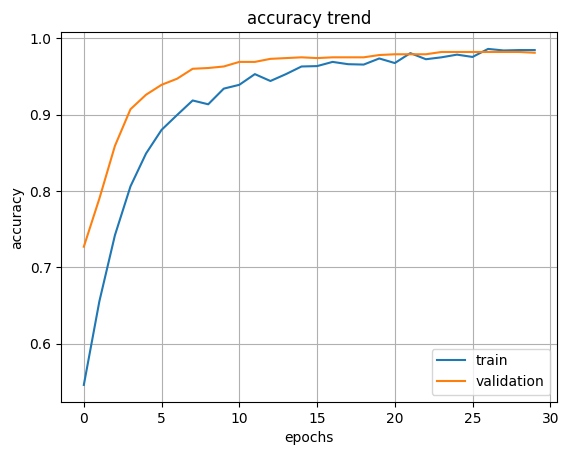

In [14]:
import matplotlib.pyplot as plt

plt.title("accuracy trend")
plt.grid()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(hist.history["accuracy"], label="train")
plt.plot(hist.history["val_accuracy"], label="validation")
plt.legend(loc="best")
plt.show()

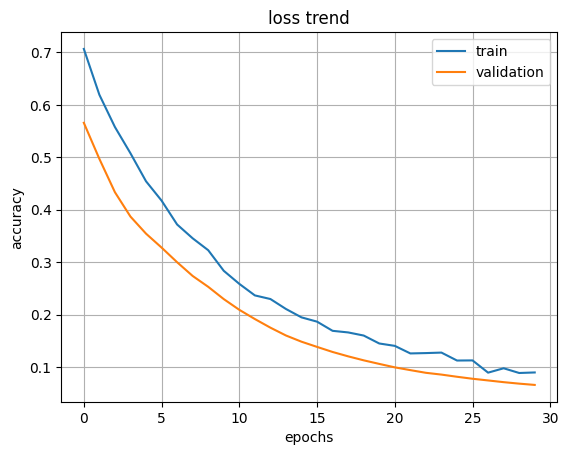

In [15]:
plt.title("loss trend")
plt.grid()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(hist.history["loss"], label="train")
plt.plot(hist.history["val_loss"], label="validation")
plt.legend(loc="best")
plt.show()

In [4]:
%pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
import cv2
import glob

test_img_name_list = glob.glob("./cat_dog/*")

for i in range(len(test_img_name_list)):
    src_img = cv2.imread(test_img_name_list[i], cv2.IMREAD_COLOR)
    src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))
    dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
    dst_img = dst_img / 255.0

    test_img_name_list[i] = dst_img

print(len(test_img_name_list))

10


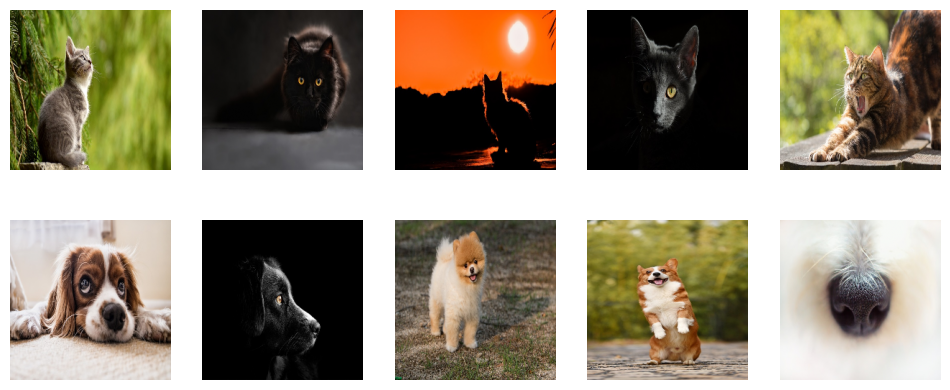

(224, 224, 3)


In [24]:
# 이미지 리스트 출력
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.axis("off")
    plt.imshow(test_img_name_list[i])
plt.show()

print(test_img_name_list[0].shape)

In [25]:
import numpy as np

print(np.array(test_img_name_list).shape)

# 모델 예측
class_name = ["cat", "dog"]
pred = model.predict(np.array(test_img_name_list))
print(pred.shape)
print(pred)

(10, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(10, 2)
[[0.6067916  0.3932084 ]
 [0.8144655  0.18553448]
 [0.8762545  0.1237455 ]
 [0.801685   0.19831498]
 [0.5523135  0.44768655]
 [0.6669986  0.3330014 ]
 [0.70204455 0.2979555 ]
 [0.6621101  0.33788988]
 [0.57504994 0.42494997]
 [0.47409773 0.52590233]]


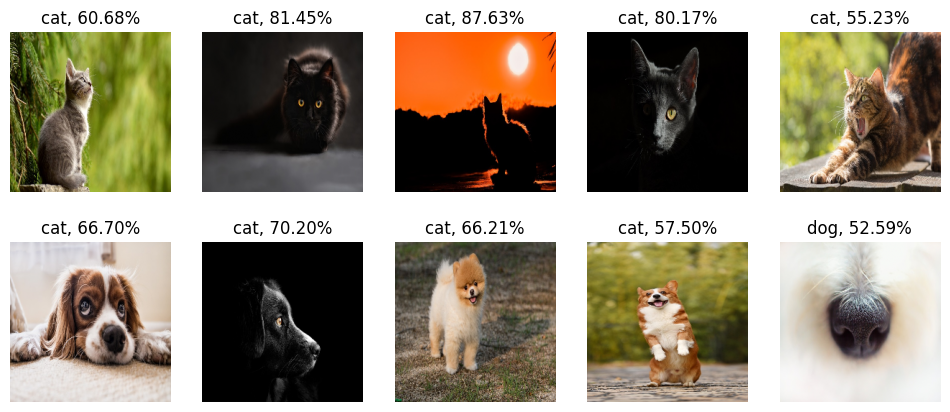

In [31]:
# 예측결과 시각화
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    prediction = str(class_name[np.argmax(pred[i])])
    probillity = "{0:0.2f}".format(100 * max(pred[i]))
    title_str = prediction + ", " + probillity + "%"
    plt.axis("off")
    plt.title(title_str)
    plt.imshow(test_img_name_list[i])
plt.show()